# SVM Classifier: Expanded Featureset
---

### 1. Read in Expanded Dataset

In [1]:
import pickle as pkl
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [11]:
# Read in Excel sheets
kd_df = pd.read_excel(open('../data/KD-FC-mrg-peter-alg-expanded-trainingset-20180315.xlsx', 'rb'), 
                        sheetname='KD expanded training set 2018')
fc_df = pd.read_excel(open('../data/KD-FC-mrg-peter-alg-expanded-trainingset-20180315.xlsx', 'rb'), 
                        sheetname='FC expanded training set 2018')
df = pd.concat([kd_df, fc_df])

In [49]:
print('KD table features:')
print(kd_df.columns)
print()
print('FC table features:')
print(fc_df.columns)

KD table features:
Index(['peternum (12/29/17)',
       'peternum cohort 12/29/17: 1=training, 2=validation', 'pnum (3/15/18)',
       'pnum cohort 3/15/18: 1=training, 2=validation', 'gender', 'doo',
       'datestudy', 'age', 'illday', 'eth', 'fever', 'rash', 'redeyes',
       'redplt', 'clnode', 'redhands', 'peeling', 'diagnosis', 'kdcrit3',
       'misskd', 'kdshock', 'rdate', 'echo_day', 'ht', 'ht_checked', 'wt',
       'bsa', 'zscore_recalc', 'lmca', 'lmcazscore', 'lad', 'ladzscore', 'rca',
       'rcazscore', 'caa', 'echocomment', 'worstcaa', 'lmcazworst',
       'ladzworst', 'rcazworst', 'zworstother', 'zworstother_date',
       'zworstever', 'zworstever_category', 'zlmca_day', 'zlad_day',
       'zrca_day', 'zother_day', 'zworst_day', 'pldate', 'lab_ill_day',
       'age_lab', 'timelab', 'pwbc', 'ppolys', 'pbands', 'plymphs', 'atylymph',
       'pmonos', 'peos', 'pbasos', 'abc', 'anc', 'phgb', 'zhemo', 'phct',
       'pplts', 'pesrsign', 'pesr', 'pcrpsign', 'pcrp', 'phscrpsign

In [12]:
# Display sample of data
df.head()

,abc,age,age_lab,anc,antifxa,atylymph,atyplymph,bnp,bsa,caa,...,zlmca_day,zother_day,zrca_day,zscore_recalc,zworst,zworst_day,zworstever,zworstever_category,zworstother,zworstother_date
0,3654.0,1.363364,1.374315,17661.0,NaN,0.0,NaN,NaN,0.49,1.0,...,38.0,NaN,5.0,1.0,NaN,5.0,1.42000,LAD,NaN,NaT
1,6409.0,0.602225,0.613177,12818.0,NaN,NaN,NaN,NaN,0.41,1.0,...,6.0,NaN,18.0,NaN,NaN,18.0,1.06151,LAD,NaN,NaT
2,2660.0,4.887164,4.892640,6460.0,NaN,NaN,NaN,NaN,0.71,1.0,...,4.0,NaN,20.0,NaN,NaN,20.0,-0.13951,LAD,NaN,NaT
3,4700.0,3.102049,3.107524,17672.0,NaN,0.0,NaN,NaN,0.60,1.0,...,21.0,35.0,42.0,1.0,NaN,35.0,12.94000,LAD,4.13,2015-04-01
4,498.0,1.349674,1.333247,12450.0,NaN,NaN,NaN,NaN,0.48,1.0,...,3.0,NaN,3.0,NaN,NaN,3.0,1.00000,RCA,NaN,NaT


In [20]:
# See how features differ between 
kd_feats = set(kd_df.columns)
fc_feats = set(fc_df.columns)

print('In KD but not FC:')
print(kd_feats - fc_feats)
print()
print('In FC but not KD:')
print(fc_feats - kd_feats)

In KD but not FC:
{'phscrp', 'worstcaa', 'zworstever', 'ht_checked', 'echocomment', 'zworstother_date', 'zworstever_category', 'antifxa', 'rcazscore', 'atylymph', 'bsa', 'zworstother', 'zlad_day', 'phscrpsign', 'rcazworst', 'misskd', 'wt', 'ladzworst', 'rdate', 'pbasos', 'echo_day', 'ht', 'lmcazworst', 'ladzscore', 'lad', 'zworst_day', 'zscore_recalc', 'zother_day', 'lmcazscore', 'diagnosis', 'lab_ill_day', 'lmca', 'zrca_day', 'kdcrit3', 'zlmca_day', 'kdshock', 'rca'}

In FC but not KD:
{'echodate', 'dxcat', 'finaldx', 'zworst', 'atyplymph'}


In [23]:
# Get inner join (features that only appear in both tables)
df_inner = pd.concat([kd_df, fc_df], join='inner')
print(df_inner.columns)

Index(['peternum (12/29/17)',
       'peternum cohort 12/29/17: 1=training, 2=validation', 'pnum (3/15/18)',
       'pnum cohort 3/15/18: 1=training, 2=validation', 'gender', 'doo',
       'datestudy', 'age', 'illday', 'eth', 'fever', 'rash', 'redeyes',
       'redplt', 'clnode', 'redhands', 'peeling', 'caa', 'pldate', 'age_lab',
       'timelab', 'pwbc', 'ppolys', 'pbands', 'plymphs', 'pmonos', 'peos',
       'abc', 'anc', 'phgb', 'zhemo', 'phct', 'pplts', 'pesrsign', 'pesr',
       'pcrpsign', 'pcrp', 'paltsign', 'palt', 'pggtsign', 'pggt', 'psodium',
       'palbumin', 'bnp', 'pua', 'label'],
      dtype='object')


In [34]:
# Only include numeric features
df_numeric = df_inner.select_dtypes(include=[np.number])
df_numeric.columns

Index(['peternum (12/29/17)',
       'peternum cohort 12/29/17: 1=training, 2=validation', 'pnum (3/15/18)',
       'pnum cohort 3/15/18: 1=training, 2=validation', 'gender', 'age',
       'illday', 'eth', 'fever', 'rash', 'redeyes', 'redplt', 'clnode',
       'redhands', 'peeling', 'caa', 'age_lab', 'pwbc', 'ppolys', 'pbands',
       'plymphs', 'pmonos', 'peos', 'abc', 'anc', 'phgb', 'zhemo', 'phct',
       'pplts', 'pesrsign', 'pesr', 'pcrpsign', 'pcrp', 'paltsign', 'palt',
       'pggtsign', 'pggt', 'psodium', 'palbumin', 'bnp', 'pua', 'label'],
      dtype='object')

In [35]:
# Drop some 'obviously' extraneous features
drop_features = ['peternum (12/29/17)', 'peternum cohort 12/29/17: 1=training, 2=validation',
                'pnum cohort 3/15/18: 1=training, 2=validation']
df_cleaned = df_numeric.drop(drop_features, axis=1)

In [46]:
print('Remaining features:')
print(df_cleaned.columns)
print()
print('Number of remaining features:')
print(len(df_cleaned.columns))

Remaining features:
Index(['pnum (3/15/18)', 'gender', 'age', 'illday', 'eth', 'fever', 'rash',
       'redeyes', 'redplt', 'clnode', 'redhands', 'peeling', 'caa', 'age_lab',
       'pwbc', 'ppolys', 'pbands', 'plymphs', 'pmonos', 'peos', 'abc', 'anc',
       'phgb', 'zhemo', 'phct', 'pplts', 'pesrsign', 'pesr', 'pcrpsign',
       'pcrp', 'paltsign', 'palt', 'pggtsign', 'pggt', 'psodium', 'palbumin',
       'bnp', 'pua', 'label'],
      dtype='object')

Number of remaining features:
39


In [81]:
# Split training features/label
df_train = df_cleaned.drop(['label'], axis=1)
df_label = df_cleaned['label']

In [82]:
# See which features have NaNs -- and if so, how many
df_train.isnull().sum()

pnum (3/15/18)       0
gender               0
age                  0
illday               0
eth                  5
fever                0
rash                 0
redeyes              0
redplt               0
clnode               0
redhands             0
peeling            169
caa                600
age_lab             40
pwbc                52
ppolys              65
pbands             219
plymphs             65
pmonos              68
peos                92
abc                218
anc                 66
phgb                58
zhemo               58
phct                56
pplts               59
pesrsign          1395
pesr               159
pcrpsign          1378
pcrp               177
paltsign          1414
palt               225
pggtsign          1405
pggt               216
psodium           1089
palbumin           463
bnp               1412
pua                344
dtype: int64

In [83]:
# Drop features with lots of NaNs (or 'sign' features)
drop_features_2 = ['caa', 'pesrsign', 'pcrpsign', 'paltsign', 'pggtsign', 'psodium', 'bnp']
df_train = df_train.drop(drop_features_2, axis=1)

In [ ]:
# Fill remaining NaNs with column mean
df_train = df_train.fillna(df_train.mean())

In [87]:
# Pull out peternum (ID) column)
df_id = df_train['pnum (3/15/18)']
df_train = df_train.drop(['pnum (3/15/18)'], axis=1)

In [89]:
print('Remaining training features:')
print(df_train.columns)
print()
print('Number of remaining training features:')
print(len(df_train.columns))

Remaining training features:
Index(['gender', 'age', 'illday', 'eth', 'fever', 'rash', 'redeyes', 'redplt',
       'clnode', 'redhands', 'peeling', 'age_lab', 'pwbc', 'ppolys', 'pbands',
       'plymphs', 'pmonos', 'peos', 'abc', 'anc', 'phgb', 'zhemo', 'phct',
       'pplts', 'pesr', 'pcrp', 'palt', 'pggt', 'palbumin', 'pua'],
      dtype='object')

Number of remaining training features:
30


### 2. Train-Test Split

In [155]:
# Perform train-test split on X, y, and IDs
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, id_train, id_test = train_test_split(df_train, df_label, df_id, stratify=df_label)

In [156]:
# Feature normalization
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [172]:
# Fit SVM model
from sklearn import svm
clf = svm.SVC(kernel='rbf', probability=True, C=.3)
clf.fit(x_train, y_train)

SVC(C=0.3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [173]:
# Make predictions
y_pred = clf.predict(x_test) # binary prediction
y_prob = clf.predict_proba(x_test)[:,1] # predicted probabilities

In [174]:
# Evaluate predictions
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, recall_score, precision_score, roc_curve
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('ROC AUC: ', roc_auc_score(y_test, y_prob))

Accuracy:  0.958448753463
Precision:  0.961165048544
Recall:  0.965853658537
F1 Score:  0.963503649635
ROC AUC:  0.986694809256


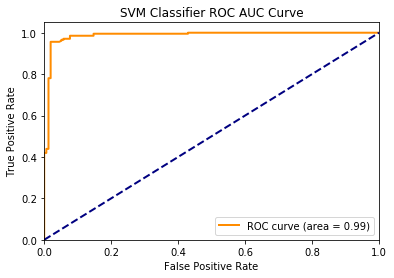

In [175]:
# Plot ROC Curve
import matplotlib.pyplot as plt
roc = roc_curve(y_test, y_prob)
fpr, tpr, thresholds = roc
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_prob))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Classifier ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

In [176]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[148,   8],
       [  7, 198]])

### 3. K-Fold CV

In [181]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [182]:
# Explain TN, FP, FN, TP
def compute_stats(y_pred, y_test):
    if y_test.ndim > 1:
        y_results = np.column_stack((y_test[:, 1], y_pred))
    else:
        y_results = np.column_stack((y_test, y_pred))
    y_arr = np.dtype((np.void, y_results.dtype.itemsize * y_results.shape[1]))
    contigview = np.ascontiguousarray(y_results).view(y_arr)
    return np.unique(contigview, return_counts=True)[1].tolist()

# Explain TN, FP, FN, TP
def explain_stats(stats):
    fc_total = stats[0] + stats[1]
    kd_total = stats[2] + stats[3]
    fc_as_fc = (stats[0] / fc_total) * 100
    print("FC Classified as FC: " + str(stats[0]) + ", (" + str(fc_as_fc) + " %)")
    fc_as_kd = (stats[1] / fc_total) * 100
    print("FC Classified as KD: " + str(stats[1]) + ", (" + str(fc_as_kd) + " %)")
    kd_as_fc = (stats[2] / kd_total) * 100
    print("KD Classified as FC: " + str(stats[2]) + ", (" + str(kd_as_fc) + " %)")
    kd_as_kd = (stats[3] / kd_total) * 100
    print("KD Classified as KD: " + str(stats[3]) + ", (" + str(kd_as_kd) + " %)")

# Train and evaluate model, print out results
def test_model(model, x, y):
    stats_arr = []
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=90007)
    for train_idx, test_idx in kf.split(x, y):
        x_train, x_test, y_train, y_test = x[train_idx], x[test_idx], y[train_idx], y[test_idx]
        y_pred = model.train_test(x_train, x_test, y_train, y_test)
        stats_arr.append(compute_stats(y_pred, y_test))
    explain_stats(np.mean(stats_arr, axis=0))

In [186]:
# Sklearn model wrapper class
class ScikitModel:
    def __init__(self, skmodel, params, verbose=False):
        self.skmodel = skmodel
        self.paramsearch = GridSearchCV(self.skmodel, params, cv=5, verbose=verbose)
        self.verbose = verbose

    def train_test(self, x_train, x_test, y_train, y_test):
        self.paramsearch.fit(x_train, y_train)
        if self.verbose == True:
            print("Best params: ", self.paramsearch.best_params_)
        y_pred = self.paramsearch.predict(x_test)
        return y_pred

In [187]:
# Prepare all x, all y
x_all = df_train.values
y_all = df_label.values
scaler = preprocessing.StandardScaler().fit(x_all)
x_scaled = scaler.transform(x_all)

In [ ]:
# Grid search params
params = {
    'C': np.logspace(-3, 3, 10),
    'gamma': np.logspace(-3, 3, 10),
    'kernel': ['linear', 'rbf', 'poly']
}

# Test model! 5-fold CV with hyperparameter optimization
clf = ScikitModel(svm.SVC(), params, verbose=1)
test_model(clf, x_scaled, y_all)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed: 13.0min finished


{'C': 0.46415888336127775, 'gamma': 0.0046415888336127772, 'kernel': 'rbf'}
Fitting 5 folds for each of 300 candidates, totalling 1500 fits
